<a href="https://colab.research.google.com/github/niemiecjakub/iozb1/blob/main/IOZB2_ConcreteCompressiveStrengthPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IOZB2 - 27.10.2021

## Concrete Compressive Strength Prediction

Dataset available at https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Concrete_Data.xls to Concrete_Data (4).xls


In [ ]:
data = pd.read_excel("Concrete_Data.xls")

In [ ]:
len(data)

1030

In [ ]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [ ]:
data.tail()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.401235


In [ ]:
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregate", "Age", "CC_Strength"]
curr_col_names = list(data.columns)

#zmiana naglowkow kolumn
mapper = {}
for i, name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]

data = data.rename(columns=mapper)
data

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [ ]:
data.isna().sum()

Cement              0
BlastFurnaceSlag    0
FlyAsh              0
Water               0
Superplasticizer    0
CoarseAggregate     0
FineAggregate       0
Age                 0
CC_Strength         0
dtype: int64

In [ ]:
data.describe()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


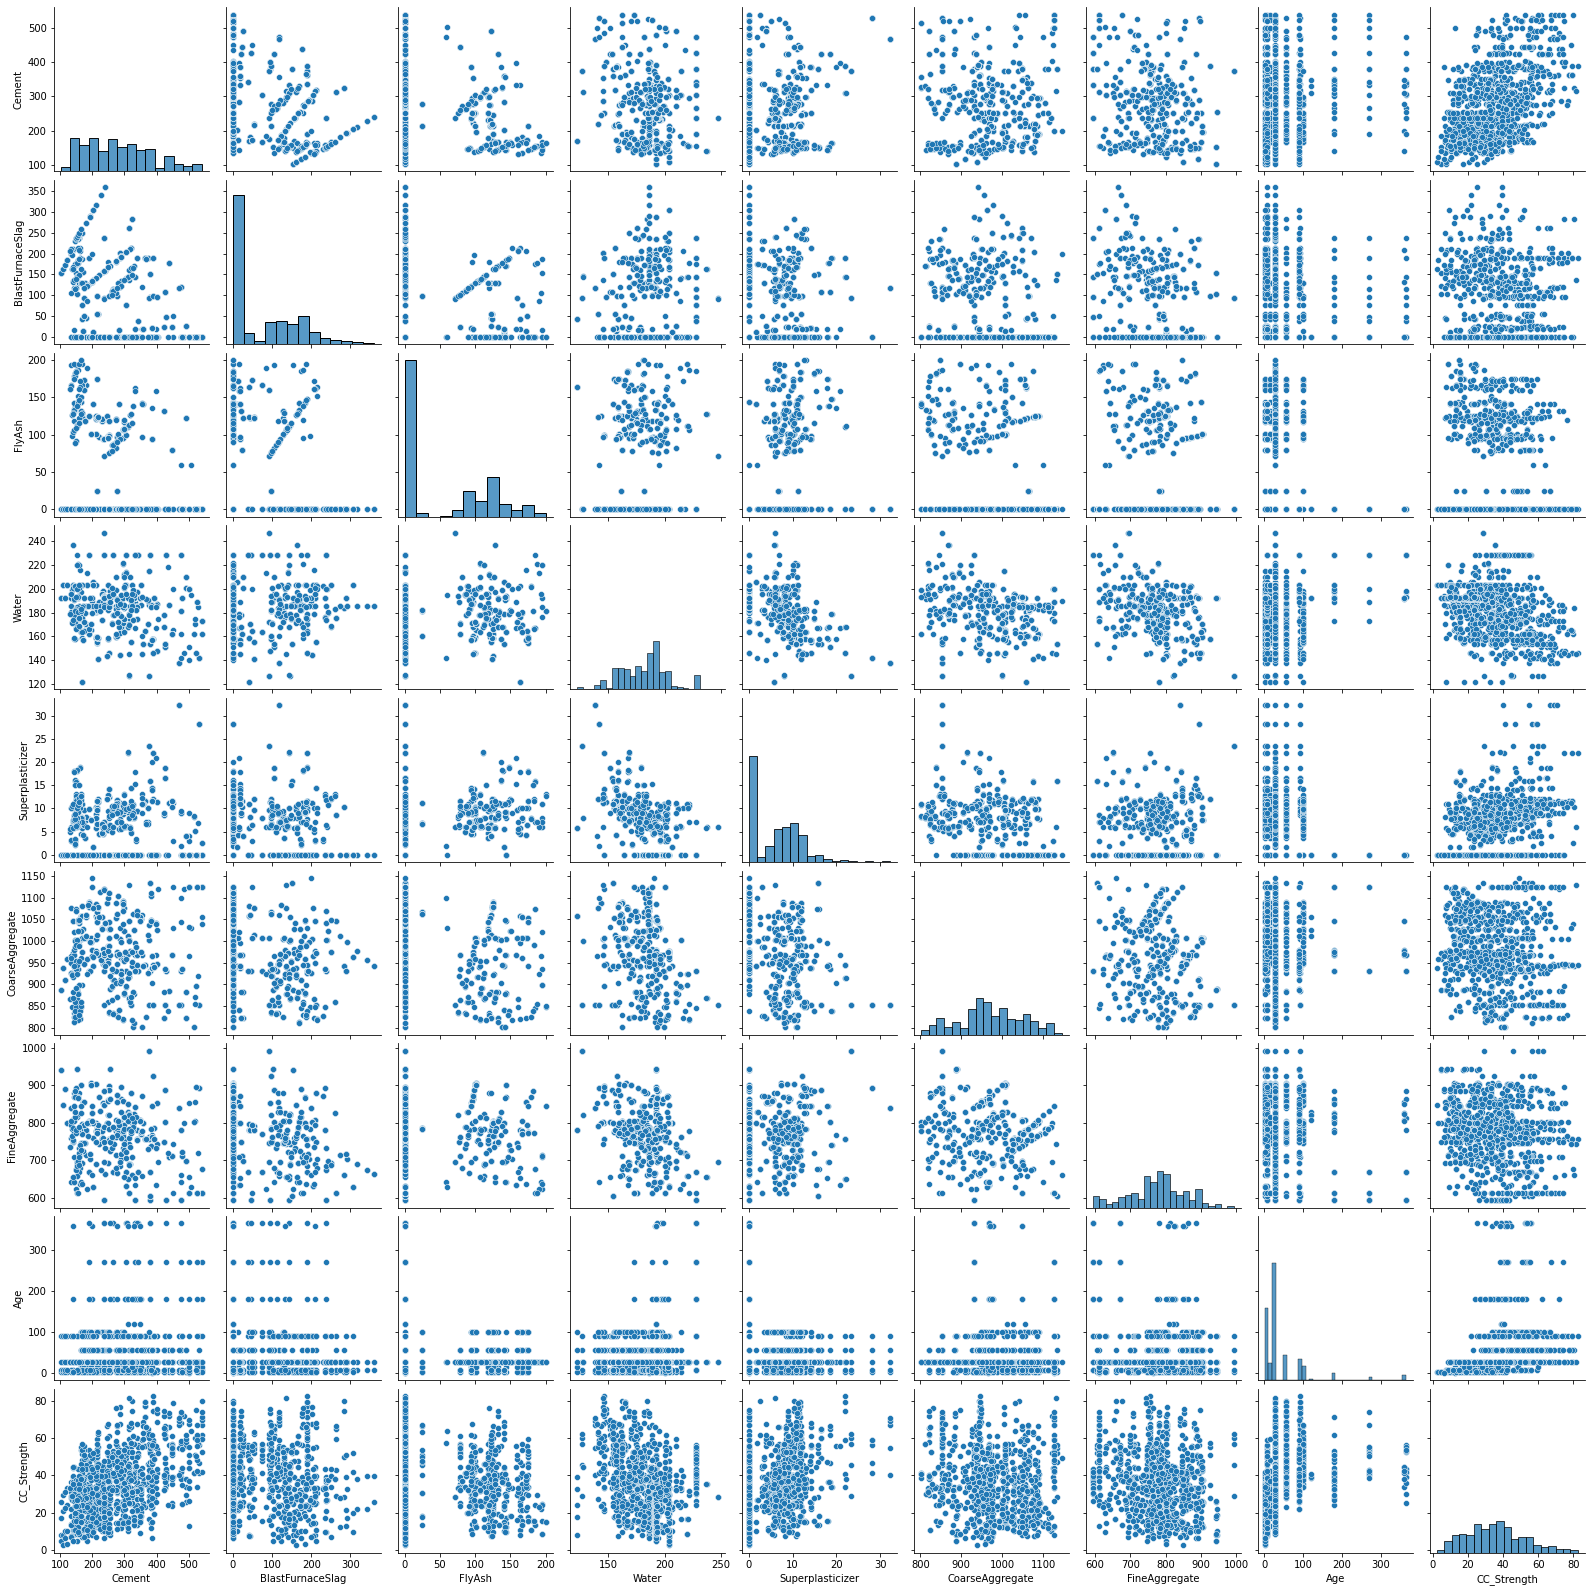

In [ ]:
sns.pairplot(data)
plt.show()

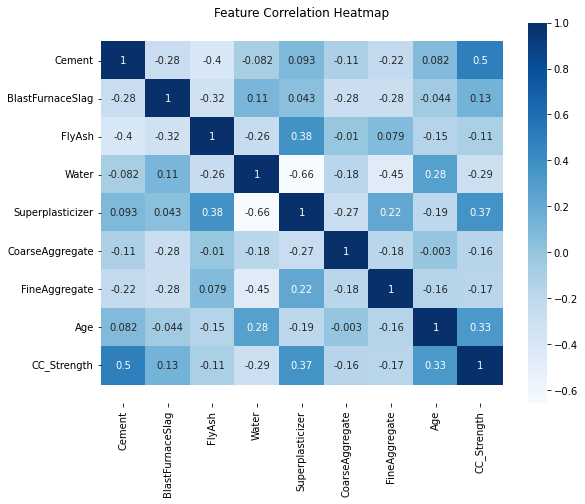

In [ ]:
corr = data.corr()

plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, cmap='Blues')
b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Compressive Strength Distribution')

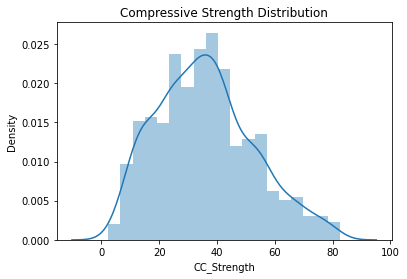

In [ ]:
ax = sns.distplot(data.CC_Strength) #histogram
ax.set_title("Compressive Strength Distribution")

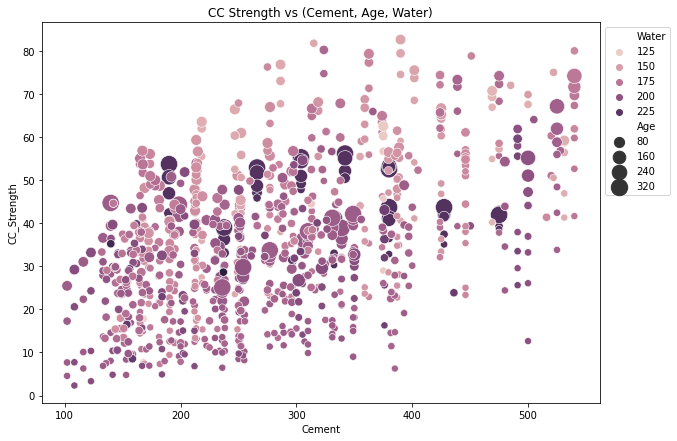

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="CC_Strength", x="Cement", hue="Water", size="Age", data=data, ax=ax, sizes=(50, 300))
ax.set_title("CC Strength vs (Cement, Age, Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

In [ ]:
X = data.iloc[:,:-1]         # Features - All columns but last
y = data.iloc[:,-1]          # Target - Last Column

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)
y_train.head()

517    15.069975
103    49.201007
242    31.350474
331    52.503597
299    22.504497
Name: CC_Strength, dtype: float64

In [ ]:
#standaryzcaja danych
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-0.75296844, -0.72248655,  1.36429772, ..., -0.38209475,
         0.2996389 , -0.59951959],
       [ 1.40536572,  0.39675536, -0.84791569, ..., -1.52676137,
         1.34072855, -0.59951959],
       [-0.485064  , -0.85167501,  1.00595052, ...,  0.71418774,
        -0.22477525,  0.18973468],
       ...,
       [-1.08252574, -0.3574704 ,  1.72248801, ...,  1.1038073 ,
         0.04704467,  0.18973468],
       [-1.18850672,  1.92000484, -0.84791569, ..., -0.46613034,
         0.06022455, -0.66394852],
       [-0.13353621,  0.46369847,  0.51706705, ..., -0.78954004,
        -0.37749258, -0.26126776]])

In [ ]:
# Importing models
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Linear Regression
lr = LinearRegression()
# Lasso Regression
lasso = Lasso()
# Ridge Regression
ridge = Ridge()

# Fitting models on Training data 
lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# Making predictions on Test data
y_pred_lr = lr.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lr)),mean_squared_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr)))
print("""LassoRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lasso)),mean_squared_error(y_test, y_pred_lasso),
            mean_absolute_error(y_test, y_pred_lasso), r2_score(y_test, y_pred_lasso)))
print("""RidgeRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_ridge)),mean_squared_error(y_test, y_pred_ridge),
            mean_absolute_error(y_test, y_pred_ridge), r2_score(y_test, y_pred_ridge)))

Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 11.49 		 132.06 	9.16 		0.59
LassoRegression 	 12.33 		 152.15 	10.07 		0.53
RidgeRegression 	 11.50 		 132.26 	9.17 		0.59


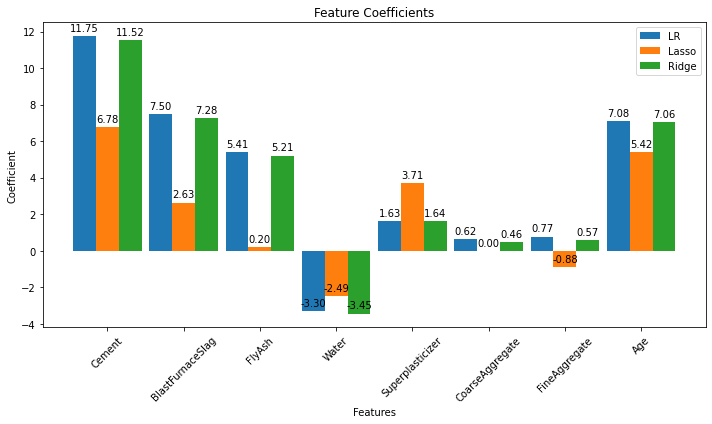

In [ ]:
coeff_lr = lr.coef_
coeff_lasso = lasso.coef_
coeff_ridge = ridge.coef_

labels = req_col_names[:-1]

x = np.arange(len(labels)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - 2*(width/2), coeff_lr, width, label='LR')
rects2 = ax.bar(x, coeff_lasso, width, label='Lasso')
rects3 = ax.bar(x + 2*(width/2), coeff_ridge, width, label='Ridge')

ax.set_ylabel('Coefficient')
ax.set_xlabel('Features')
ax.set_title('Feature Coefficients')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

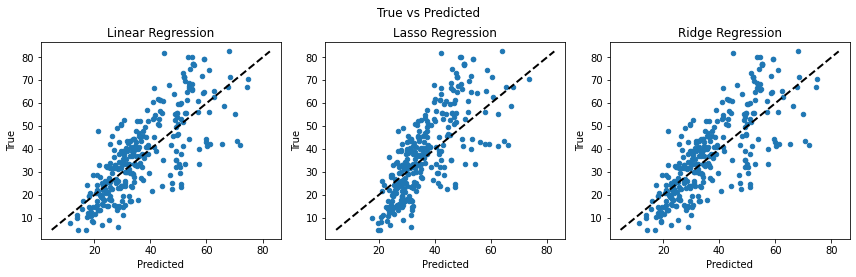

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))

ax1.scatter(y_pred_lr, y_test, s=20)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax1.set_ylabel("True")
ax1.set_xlabel("Predicted")
ax1.set_title("Linear Regression")

ax2.scatter(y_pred_lasso, y_test, s=20)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_ylabel("True")
ax2.set_xlabel("Predicted")
ax2.set_title("Lasso Regression")

ax3.scatter(y_pred_ridge, y_test, s=20)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax3.set_ylabel("True")
ax3.set_xlabel("Predicted")
ax3.set_title("Ridge Regression")

fig.suptitle("True vs Predicted")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

Model				 RMSE 		 MSE 		 MAE 		 R2
Decision Tree Regressor 	 7.35 		 54.10 		4.84 		0.83


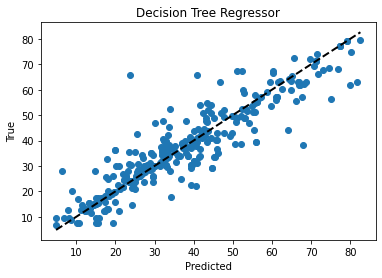

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=6)

dtr.fit(X_train, y_train)

y_pred_dtr = dtr.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Decision Tree Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_dtr)),mean_squared_error(y_test, y_pred_dtr),
            mean_absolute_error(y_test, y_pred_dtr), r2_score(y_test, y_pred_dtr)))

plt.scatter(y_test, y_pred_dtr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree Regressor")
plt.show()

Model				 RMSE 		 MSE 		 MAE 		 R2
SVM 				 12.03 		 144.72 		9.20 		0.55


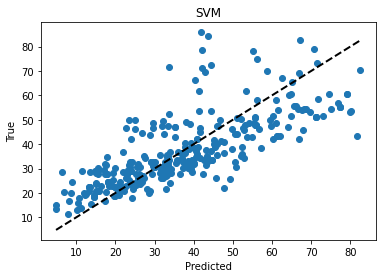

In [ ]:
from sklearn import svm

svm_mod = svm.SVR(kernel="linear")

svm_mod.fit(X_train, y_train)

y_pred_dtr = svm_mod.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""SVM \t\t\t\t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_dtr)),mean_squared_error(y_test, y_pred_dtr),
            mean_absolute_error(y_test, y_pred_dtr), r2_score(y_test, y_pred_dtr)))

plt.scatter(y_test, y_pred_dtr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("SVM")
plt.show()

Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 5.88 		 34.53 		3.95 		0.89


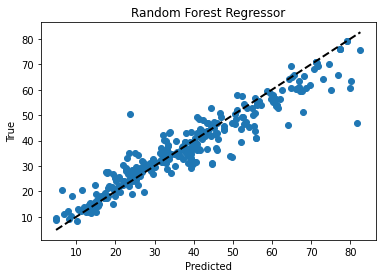

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100, random_state=3)

rfr.fit(X_train, y_train)

y_pred_rfr = rfr.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rfr)),mean_squared_error(y_test, y_pred_rfr),
            mean_absolute_error(y_test, y_pred_rfr), r2_score(y_test, y_pred_rfr)))

plt.scatter(y_test, y_pred_rfr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Regressor")
plt.show()

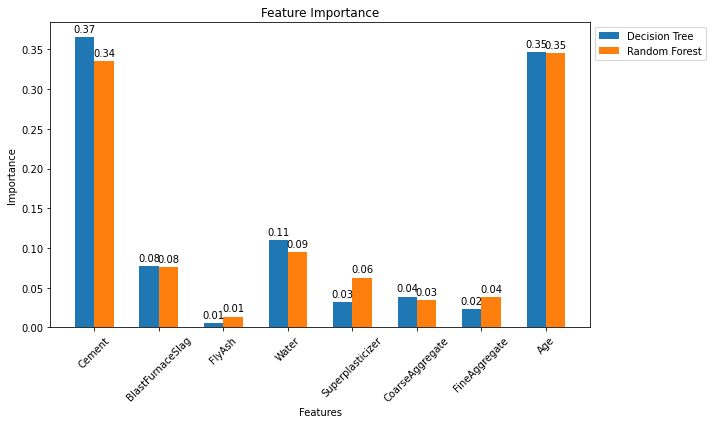

In [ ]:
feature_dtr = dtr.feature_importances_
feature_rfr = rfr.feature_importances_

labels = req_col_names[:-1]

x = np.arange(len(labels)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x-(width/2), feature_dtr, width, label='Decision Tree')
rects2 = ax.bar(x+(width/2), feature_rfr, width, label='Random Forest')

ax.set_ylabel('Importance')
ax.set_xlabel('Features')
ax.set_title('Feature Importance')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend(loc="upper left", bbox_to_anchor=(1,1))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

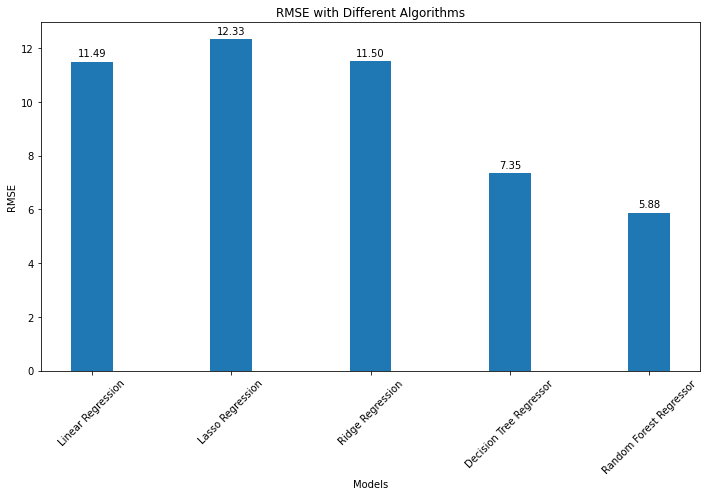

In [ ]:
models = [lr, lasso, ridge, dtr, rfr]
names = ["Linear Regression", "Lasso Regression", "Ridge Regression", 
         "Decision Tree Regressor", "Random Forest Regressor"]
rmses = []

for model in models:
    rmses.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

x = np.arange(len(names)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,7))
rects = ax.bar(x, rmses, width)
ax.set_ylabel('RMSE')
ax.set_xlabel('Models')
ax.set_title('RMSE with Different Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=45)
autolabel(rects)
fig.tight_layout()
plt.show()

In [ ]:
########################################################################

Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 7.40 		 54.70 		6.08 		0.80


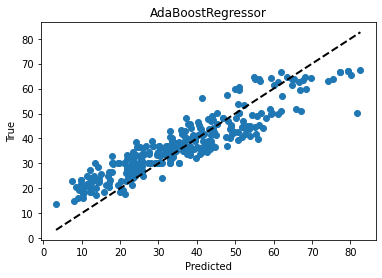

In [ ]:
# 1) dodać kolejny (szósty) model do notatnika do predykcji wytrzymałości. Wybrać jeden z listy: SVM, kNN, GPR, AdaBoost, ANN)

from sklearn.ensemble import AdaBoostRegressor
X = data.iloc[:,:-1]        
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
y_train.head()
#standaryzcaja danych
sc = StandardScaler()


rfr = AdaBoostRegressor(n_estimators=100, random_state=5)
rfr.fit(X_train, y_train)

y_pred_rfr = rfr.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rfr)),mean_squared_error(y_test, y_pred_rfr),
            mean_absolute_error(y_test, y_pred_rfr), r2_score(y_test, y_pred_rfr)))
RMSE_untransformed = np.sqrt(mean_squared_error(y_test, y_pred_rfr))
plt.scatter(y_test, y_pred_rfr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("AdaBoostRegressor")
plt.show()

In [ ]:
########################################################################

Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 7.27 		 52.92 		5.91 		0.81


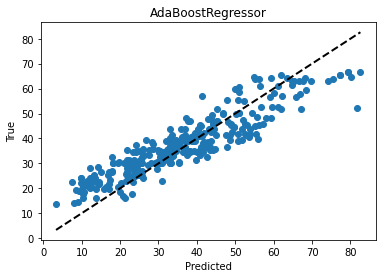

Dla danych bez transformacji uzyskano wynik 7.40, a dla danych z transformacjią 7.27
Transformacja danych nieznacznie poprawiła model


In [ ]:
# 2) zbadać wpływ transformacji danych na wyniki predykcji (nieobowiązkowe)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
y_train.head()
#standaryzcaja danych
sc = StandardScaler()
#transformacja danych
X_train_transformed = sc.fit_transform(X_train)
X_test_transformed = sc.transform(X_test)

rfr = AdaBoostRegressor(n_estimators=100, random_state=5)

rfr.fit(X_train_transformed, y_train)
y_pred_rfr = rfr.predict(X_test_transformed)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rfr)),mean_squared_error(y_test, y_pred_rfr),
            mean_absolute_error(y_test, y_pred_rfr), r2_score(y_test, y_pred_rfr)))

RMSE_transformed = np.sqrt(mean_squared_error(y_test, y_pred_rfr))
plt.scatter(y_test, y_pred_rfr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("AdaBoostRegressor")
plt.show()


In [ ]:
print(f"Dla danych bez transformacji uzyskano wynik {RMSE_untransformed:.2f}, a dla danych z transformacjią {RMSE_transformed:.2f}")
print("Transformacja danych nieznacznie poprawiła model")

Dla danych bez transformacji uzyskano wynik 7.40, a dla danych z transformacjią 7.27
Transformacja danych nieznacznie poprawiła model


In [ ]:
########################################################################

Max value is 8.68 for test size 0.9
Min value is 7.16 for test size 0.1
╒═══════╤═══════╤═══════╤═══════╤═══════╤═══════╤═══════╤═══════╤═══════╕
│   0.1 │   0.2 │   0.3 │   0.4 │   0.5 │   0.6 │   0.7 │   0.8 │   0.9 │
╞═══════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╡
│  7.16 │  7.36 │  7.91 │  7.53 │  7.83 │  7.97 │  7.81 │  8.17 │  8.68 │
╘═══════╧═══════╧═══════╧═══════╧═══════╧═══════╧═══════╧═══════╧═══════╛


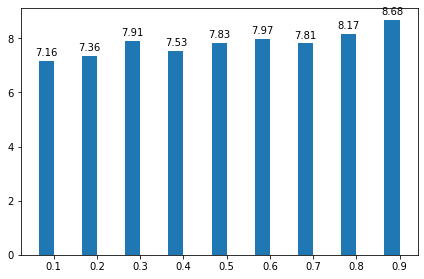

In [ ]:
# 3) zbadać wpływ proporcji danych do uczenia i testowania. Przyjąć trzy różne wartości.
#Aby zbadac wpływ proporcji danych do uczenia i testowania przyjęto stały random_state danych = 25, zmienną jest tylko proporcja danych do testowania/uczenia , z zakresu 0.1-0.9 z krokiem 0.1
#posłużono się modelem AdaBoostRegressor
from tabulate import tabulate
import random

test_size_to_check = list(range(1,10,1))
test_size_to_check = [x / 10 for x in test_size_to_check]
sc = StandardScaler()

rmse = []

for i in test_size_to_check:
  test_size = i
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=25)
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  rfr = AdaBoostRegressor(n_estimators=100, random_state=25)
  rfr.fit(X_train, y_train)
  y_pred_rfr = rfr.predict(X_test)
  RMSE = round(np.sqrt(mean_squared_error(y_test, y_pred_rfr)),2)
  rmse.append(RMSE)

print(f"Max value is {max(rmse)} for test size {test_size_to_check[rmse.index(max(rmse))]}")
print(f"Min value is {min(rmse)} for test size {test_size_to_check[rmse.index(min(rmse))]}")
table = [test_size_to_check, rmse]
print(tabulate(table, headers='firstrow',tablefmt='fancy_grid'))

x = np.arange(len(test_size_to_check))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1= ax.bar(x - width/2, rmse, width, label='RMSE')
ax.set_xticks(x)
ax.set_xticklabels(test_size_to_check)

for rect in rects1:
  height = rect.get_height()
  ax.annotate('{}'.format(height),xy=(rect.get_x() + rect.get_width() / 2, height),xytext=(0, 3),textcoords="offset points",ha='center', va='bottom')

fig.tight_layout()
plt.show()

# Można zauważyć korelacje:
# najmniejszy wynik uzyskany jest dla wartości 0.1 danych do testowania == 0.9 danych do uczenia
# największy wynik uzyskany jest dla wartości 0.9 danych do testowania == 0.1 danych do uczenia
# wraz z zmniejszeniem ilości danych do uczenia spada dokładność modelu
#można sprawdzić czy przy innych wartościach pseudolosowych random_state ta korelacja jest utrzymana, co sprawdzono poniżej


Random state	-1-	max value 8.64 for 0.9	--	min value 6.8 for 0.1
Random state	-31-	max value 8.32 for 0.9	--	min value 7.67 for 0.4
Random state	-2-	max value 8.88 for 0.9	--	min value 7.37 for 0.1
Random state	-89-	max value 8.65 for 0.9	--	min value 7.15 for 0.1
Random state	-67-	max value 9.73 for 0.9	--	min value 7.46 for 0.2
Random state	-49-	max value 10.1 for 0.9	--	min value 7.7 for 0.1
Random state	-46-	max value 8.5 for 0.6	--	min value 7.51 for 0.1
Random state	-54-	max value 9.4 for 0.9	--	min value 7.56 for 0.5
Random state	-51-	max value 8.48 for 0.9	--	min value 7.04 for 0.1
Random state	-97-	max value 8.82 for 0.9	--	min value 7.76 for 0.2
╒═══════════════════════════════╤═══════╤═══════╤═══════╤═══════╤═══════╤═══════╤═══════╤═══════╤═══════╕
│   Random state/Test data size │   0.1 │   0.2 │   0.3 │   0.4 │   0.5 │   0.6 │   0.7 │   0.8 │   0.9 │
╞═══════════════════════════════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╡
│                 

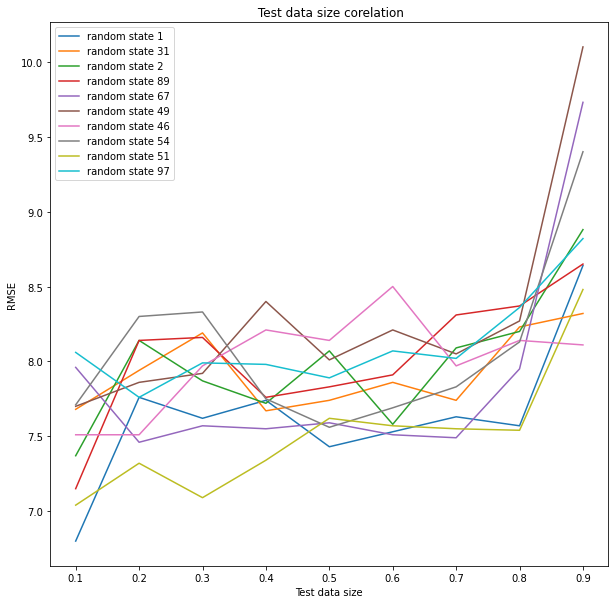

In [ ]:
# 4) zbadać wpływ podziału danych na część do uczenia i testowania (random_seed). Przyjąć trzy różne wartości.
# 3) zbadać wpływ proporcji danych do uczenia i testowania. Przyjąć trzy różne wartości.


restult_values = {}
random_states = [random.randint(1,100) for i in range(10)] #10 losowych stanow z zakresu 1-100

for i in random_states:
  rmse = []
  for j in test_size_to_check:
    test_size = j

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    rfr = AdaBoostRegressor(n_estimators=100, random_state=25)
    rfr.fit(X_train, y_train)
    y_pred_rfr = rfr.predict(X_test)

    RMSE = round(np.sqrt(mean_squared_error(y_test, y_pred_rfr)),2)
    rmse.append(RMSE)
    restult_values[i] = rmse

  print(f"Random state\t-{i}-\tmax value {max(rmse)} for {test_size_to_check[rmse.index(max(rmse))]}\t--\tmin value {min(rmse)} for {test_size_to_check[rmse.index(min(rmse))]}")

header = ["Random state/Test data size"] + test_size_to_check
table = [header]

for i in restult_values:
  mutated_data = [i] + restult_values[i]
  table.append(mutated_data)

print(tabulate(table, headers='firstrow',tablefmt='fancy_grid'))

fig = plt.figure(figsize = (10, 10))
for i in restult_values:
  plt.plot(test_size_to_check, restult_values[i], label = f"random state {i}")
  

plt.xlabel("Test data size")
plt.ylabel("RMSE")
plt.title(" Test data size corelation")
plt.legend()
plt.show()



In [ ]:
########################################################################

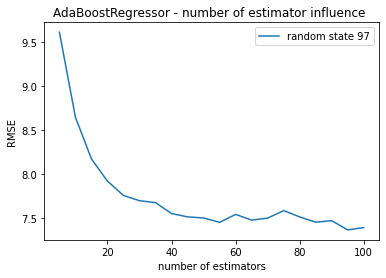

In [ ]:
# 5) zbadać wpływ wybranego hiperaparametru wybranego modelu na wyniki predykcji (na przykład liczba drzew decyzyjnych w modelu RF). Przyjąć trzy różne wartości.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
y_train.head()
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

n_estimators = list(range(5,105,5))
rmse = []

for j in n_estimators:
  rfr = AdaBoostRegressor(n_estimators=j, random_state=3)
  rfr.fit(X_train, y_train)
  y_pred_rfr = rfr.predict(X_test)
  RMSE = round(np.sqrt(mean_squared_error(y_test, y_pred_rfr)),2)
  rmse.append(RMSE)

plt.plot(n_estimators, rmse, label = f"random state {i}")
plt.xlabel("number of estimators")
plt.ylabel("RMSE")
plt.title("AdaBoostRegressor - number of estimator/RMSE  ")
plt.show()



╒═════════════════════════════════════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤═══════╕
│   Random state/Number of estimators │    5 │   10 │   15 │   20 │   25 │   30 │   35 │   40 │   45 │   50 │   55 │   60 │   65 │   70 │   75 │   80 │   85 │   90 │   95 │   100 │
╞═════════════════════════════════════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪═══════╡
│                                  82 │ 8.87 │ 8.17 │ 8.14 │ 7.88 │ 7.76 │ 7.41 │ 7.6  │ 7.5  │ 7.43 │ 7.38 │ 7.39 │ 7.42 │ 7.44 │ 7.49 │ 7.48 │ 7.55 │ 7.42 │ 7.49 │ 7.43 │  7.4  │
├─────────────────────────────────────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼───────┤
│                                 100 │ 9.1  │ 8.66 │ 8.25 │ 7.99 │ 7.96 │ 7.78 │ 7.78 │ 7.63 │

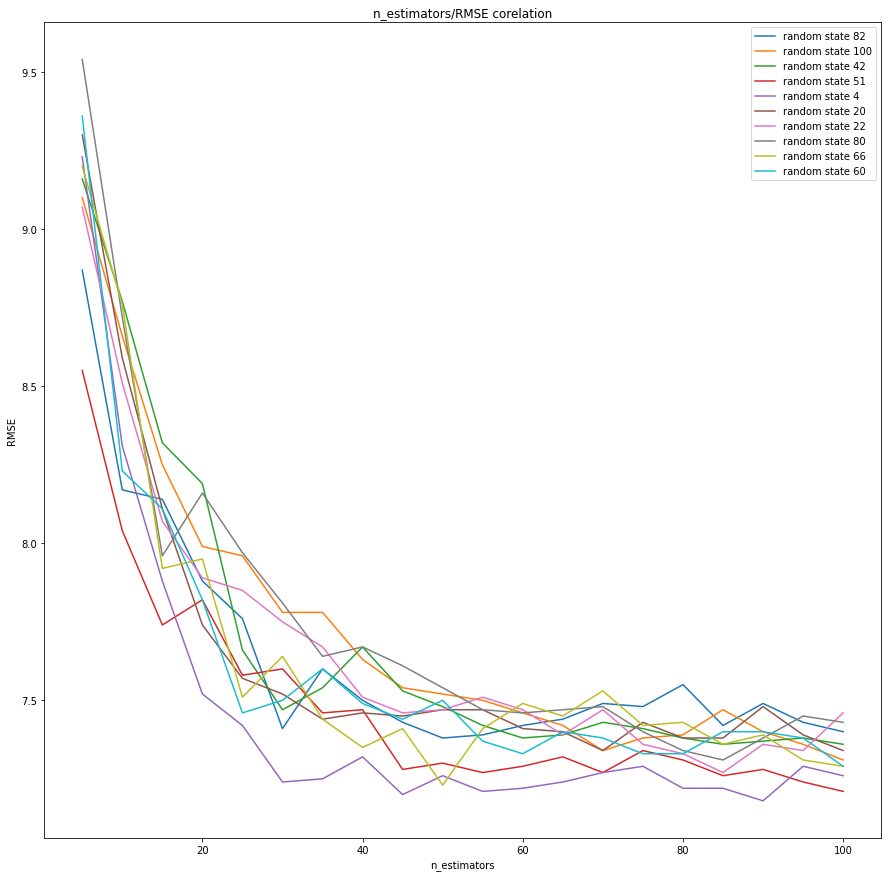

In [ ]:
restult_values = {}
random_states = [random.randint(1,100) for i in range(10)] #10 losowych stanow z zakresu 1-100

for i in random_states:
  rmse = []
  for j in n_estimators:
    rfr = AdaBoostRegressor(n_estimators=j, random_state=i)
    rfr.fit(X_train, y_train)
    y_pred_rfr = rfr.predict(X_test)
    RMSE = round(np.sqrt(mean_squared_error(y_test, y_pred_rfr)),2)
    rmse.append(RMSE)
    restult_values[i] = rmse



header = ["Random state/Number of estimators"] + n_estimators
table = [header]
for i in restult_values:
  mutated_data = [i] + restult_values[i]
  table.append(mutated_data)
print(tabulate(table, headers='firstrow',tablefmt='fancy_grid'))

fig = plt.figure(figsize = (10, 10))
for i in restult_values:
  plt.plot(n_estimators, restult_values[i], label = f"random state {i}")
  

plt.xlabel("number of estimator")
plt.ylabel("RMSE")
plt.title("AdaBoostRegressor - number of estimator/RMSE")
plt.legend()
plt.show()

#występuje zależność - im większa wartość n_estimator (liczba modeli do iteracyjnego trenowania) tym wynik dokładniejszy